# Car Evaluation Data Set

[Source](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Car%20Evaluation)

## Explratory Data Analysis

Car Evaluation Data Set consists of 7 attributes. Buying, maint, doors, persons, lug_boot, safery are 6 features of cars, and class is the target variable.  
The goal is to predict car acceptability (class) of a car using these 6 features.  
The table below shows the deletailed definition of each attribute.

| Attribute name  | Definition                                              |
|-----------------|---------------------------------------------------------|
| buying          | Buying price of the car (v-high, high, med, low)        |
| maint           | Price of the maintenance of car (v-high, high, med, low)|
| doors           | Number of doors (2, 3, 4, 5-more)                       |
| persons         | Capacity in terms of persons to carry (2, 4, more)      |
| lug_boot        | The size of luggage boot (small, med, big)              |
| safety          | Estimated safety of the car (low, med, high)            |
| class           | Car acceptability (unacc: unacceptible, acc: acceptible, good: good,   v-good: very good) |

Imporing needed libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

Reading the dataset, adding headers to the columns.

In [29]:
headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('data\Car Evaluation\car.data', header=None, names=headers)

In [30]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


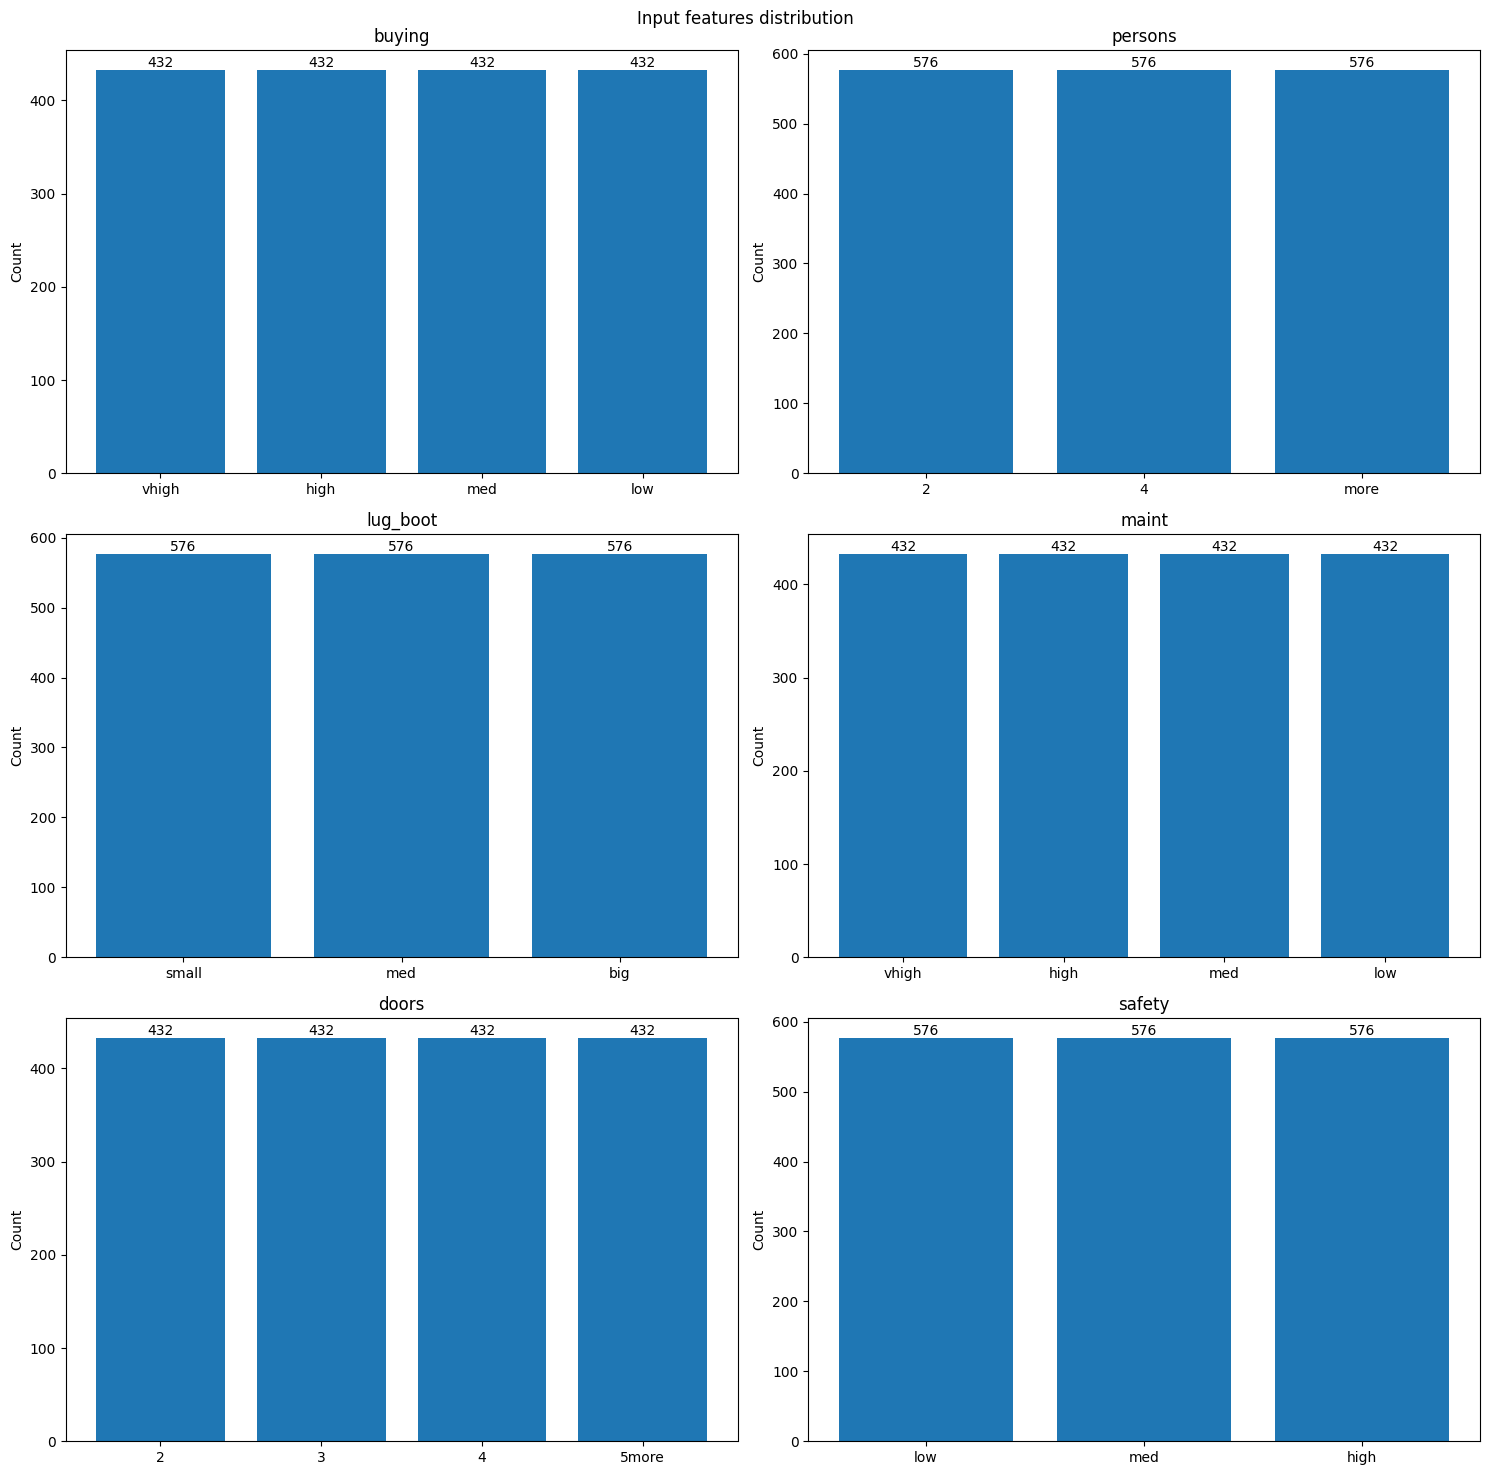

In [32]:
attributes = df.drop(columns=['class'])
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
subplt = 0
for attribute in attributes:
    ax = axs[subplt%3, subplt%2]
    bar_plot = ax.bar(attributes[attribute].unique(), attributes[attribute].value_counts())
    ax.bar_label(bar_plot, label_type='edge')
    ax.set_ylabel('Count')
    ax.set_title(attribute)
    subplt += 1

plt.suptitle("Input features distribution")

plt.tight_layout()
plt.show()

In [33]:
print('Target feature distribution, fraction')
tgt_fraction = pd.DataFrame(df['class'].value_counts(normalize=True).sort_index())
tgt_fraction.round(2).T.style.background_gradient(axis=1)

Target feature distribution, fraction


,acc,good,unacc,vgood
class,0.220000,0.040000,0.700000,0.040000


As we can see, in our dataset there is no missed values.  
Target feature distribution:
- acc: 22.22% of the instances were labeled as acceptable.
- good: 4% of the instances were labeled as good.
- unacc: the majority of instances, 70%, were labeled as unacceptable.
- vgood: 4% of the instances were labeled as very good.

All features in our dataframe are ordinal categorical data. Therefore, we can perform label encoding so we could work with our dataset.  

In [34]:
label_encoded_df = df.copy()
label_encoder = LabelEncoder()

for column in label_encoded_df.columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

label_encoded_df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [36]:
encoded_dictionary = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
encoded_dictionary

{'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}

In [37]:
label_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int32
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


In [38]:
fig = px.imshow(
    label_encoded_df.corr(), aspect="auto", title='Pearson correlation between features',
    labels=dict(color="corr")
)

fig.show()

We will use F1 score as metric for our problem as the harmonic mean of precision and recall.

In [41]:
label_encoded_df[label_encoded_df["class"]==0]

,buying,maint,doors,persons,lug_boot,safety,class
227,3,2,0,1,2,0,0
230,3,2,0,1,1,0,0
232,3,2,0,1,0,2,0
233,3,2,0,1,0,0,0
239,3,2,0,2,1,0,0
...,...,...,...,...,...,...,...
1666,1,1,1,2,2,2,0
1684,1,1,2,1,2,2,0
1693,1,1,2,2,2,2,0
1711,1,1,3,1,2,2,0
